In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("emails.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [6]:
df.duplicated().sum()

33

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['clean_text'] = df['text'].str.lower()

In [9]:
df.head()

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,subject: naturally irresistible your corporate...
1,Subject: the stock trading gunslinger fanny i...,1,subject: the stock trading gunslinger fanny i...
2,Subject: unbelievable new homes made easy im ...,1,subject: unbelievable new homes made easy im ...
3,Subject: 4 color printing special request add...,1,subject: 4 color printing special request add...
4,"Subject: do not have money , get software cds ...",1,"subject: do not have money , get software cds ..."


In [10]:
df['clean_text'] = df['clean_text'].str.replace(r'^subject:\s*', '', regex=True)

In [11]:
df.head()

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identity...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merrill...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting t...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional i...
4,"Subject: do not have money , get software cds ...",1,"do not have money , get software cds from here..."


In [12]:
df['clean_text'] = df['clean_text'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

In [13]:
df.head()

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identity...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merrill...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting t...
3,Subject: 4 color printing special request add...,1,4 color printing special request additional i...
4,"Subject: do not have money , get software cds ...",1,do not have money get software cds from here ...


In [14]:
df['clean_text'] = df['clean_text'].str.replace(r'\d+', 'num', regex=True)

In [15]:
df.head()

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible your corporate identity...
1,Subject: the stock trading gunslinger fanny i...,1,the stock trading gunslinger fanny is merrill...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting t...
3,Subject: 4 color printing special request add...,1,num color printing special request additional...
4,"Subject: do not have money , get software cds ...",1,do not have money get software cds from here ...


In [16]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdelrahman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [18]:
df.head()

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,naturally irresistible corporate identity lt r...
1,Subject: the stock trading gunslinger fanny i...,1,stock trading gunslinger fanny merrill muzo co...
2,Subject: unbelievable new homes made easy im ...,1,unbelievable new homes made easy im wanting sh...
3,Subject: 4 color printing special request add...,1,num color printing special request additional ...
4,"Subject: do not have money , get software cds ...",1,money get software cds software compatibility ...


In [19]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [20]:
df.head()

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,natur irresist corpor ident lt realli hard rec...
1,Subject: the stock trading gunslinger fanny i...,1,stock trade gunsling fanni merril muzo colza a...
2,Subject: unbelievable new homes made easy im ...,1,unbeliev new home made easi im want show homeo...
3,Subject: 4 color printing special request add...,1,num color print special request addit inform c...
4,"Subject: do not have money , get software cds ...",1,money get softwar cd softwar compat great grow...


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_text"])
y = df["spam"]

In [22]:
X.shape, y.shape

((5695, 25640), (5695,))

Multinomial Naive Bayes

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [25]:
model.score(X_test, y_test)

0.8726953467954346

In [26]:
model.score(X_train, y_train)

0.9126426690079017

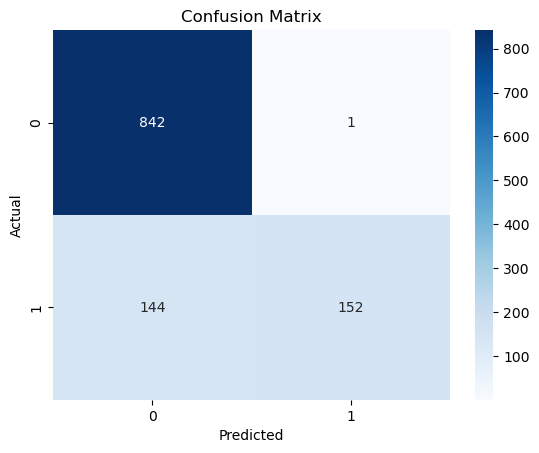

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       843
           1       0.99      0.51      0.68       296

    accuracy                           0.87      1139
   macro avg       0.92      0.76      0.80      1139
weighted avg       0.89      0.87      0.86      1139



In [27]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))



RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
rf_model.score(X_test, y_test)

0.9622475856014048

In [30]:
rf_model.score(X_train, y_train)

1.0

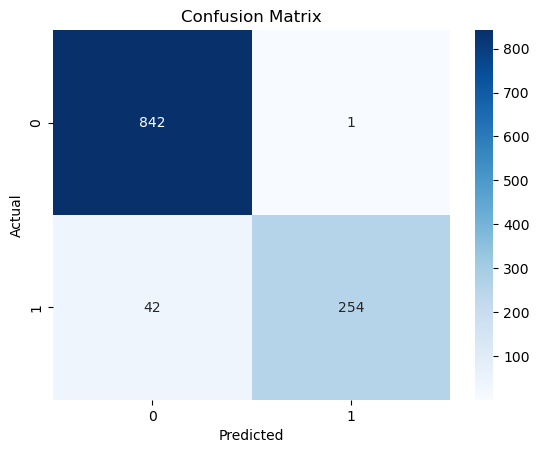

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       843
           1       1.00      0.86      0.92       296

    accuracy                           0.96      1139
   macro avg       0.97      0.93      0.95      1139
weighted avg       0.96      0.96      0.96      1139



In [31]:
y_pred = rf_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))

LinearSVC

In [32]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

LinearSVC()

In [33]:
svm_model.score(X_test, y_test)

0.9929762949956101

In [34]:
svm_model.score(X_train, y_train)

1.0

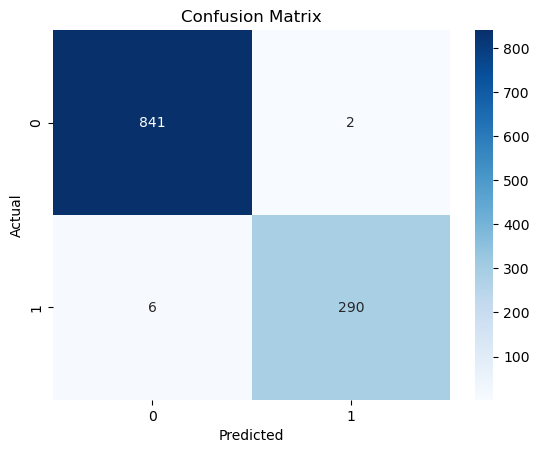

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       843
           1       0.99      0.98      0.99       296

    accuracy                           0.99      1139
   macro avg       0.99      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139



In [35]:
y_pred = svm_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))

LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
logistic_model.score(X_test, y_test)

0.9736611062335382

In [38]:
logistic_model.score(X_train, y_train)

0.9953906935908692

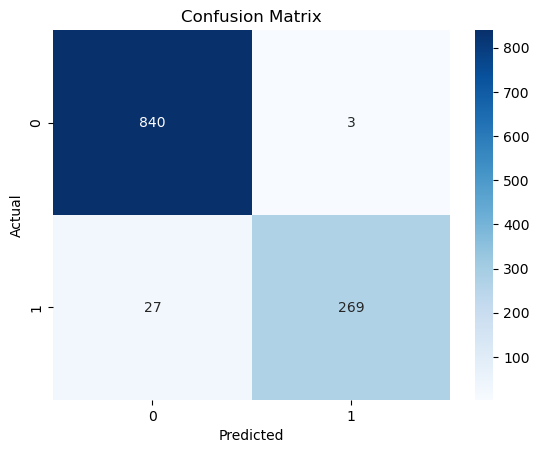

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       843
           1       0.99      0.91      0.95       296

    accuracy                           0.97      1139
   macro avg       0.98      0.95      0.96      1139
weighted avg       0.97      0.97      0.97      1139



In [39]:
y_pred = logistic_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred))

In [40]:
import joblib

joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [41]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']